# HW7: Z-test, T-test, and Sample mean difference test.

Total : 50 pts This is an individual assignment.

this is a programming assignment. 

## Problem 1

(10 pt)
A nutritionist claims that the average sugar content in a certain brand of energy drink is 27 grams. A sample of 50 drinks has an average sugar content of 28.2 grams with a standard deviation of 3.5 grams.

- At α = 0.02, test whether the nutritionist’s claim is correct.


In [1]:
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt


# Given values
n = 50
pop_mean = 27
sample_mean = 28.2
sample_std = 3.5

sem = sample_std / math.sqrt(n)

# Compute the absolute t-score
t_score = np.abs(sample_mean - pop_mean) / sem

# Create a t-distribution object with df = n - 1
T0 = stats.t(df=n-1)

# Compute the one-tailed p-value (for the two-tailed test, compare p_value with alpha/2)
p_value = T0.sf(t_score)

alpha = 0.02
# For a two-tailed test, compare the one-tailed p_value with alpha/2
if p_value > alpha/2:
    print("Cannot reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


## Problem 2

(15 pt)
Consider the dataset “nba_player_stats.csv”, which contains season-by-season statistics for NBA players from 1950 to 2023, including points scored.
1. (2 pt) Plot the year versus the points scored (PTS) for all players in each season.
2. (3 points) Create two groups of average player PTS:

- Group 1: Players from seasons 1950 to 1985
    
- Group 2: Players from seasons 1986 to 2023

plot the histogram of the player's PTS for these two groups.

3.(10 pt) Based on the observation, analyze whether scoring trends have changed over time. Does the data suggest that NBA players score less points per game in modern basketball (group 2)? at $\alpha =0.05$,  test whether there is a significant difference in mean scores between the two groups.

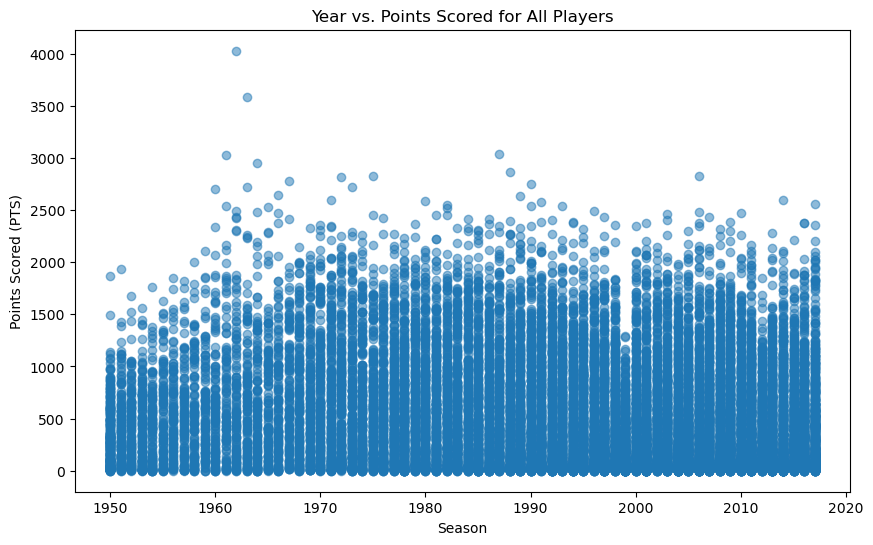

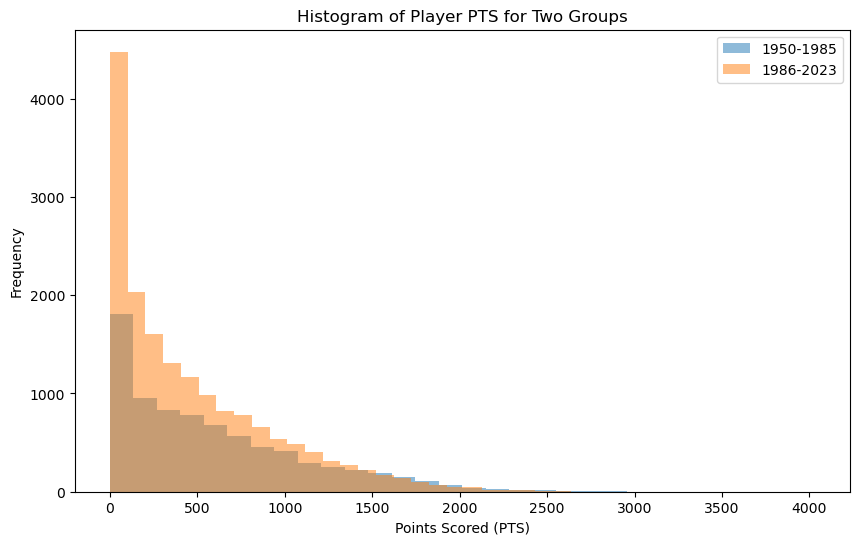

mean 1 and mean 2 are 591.3833375602334 471.8279364320707
The p-value is 1.2750674399662833e-65
Reject the null hypothesis
Mean PTS (1950-1985): 591.3833375602334
Mean PTS (1986-2023): 471.8279364320707


In [5]:
df = pd.read_csv("nba_seasons_stats.csv")


# --- Part 1: Plot Year vs. Points Scored ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['PTS'], alpha=0.5)
plt.xlabel("Season")
plt.ylabel("Points Scored (PTS)")
plt.title("Year vs. Points Scored for All Players")
plt.show()

# --- Part 2: Create Groups and Plot Histograms ---
# Define groups based on the season
group1 = df[(df['Year'] >= 1950) & (df['Year'] <= 1985)]
group2 = df[(df['Year'] >= 1986) & (df['Year'] <= 2023)]

# Plot histograms for the two groups
plt.figure(figsize=(10, 6))
plt.hist(group1['PTS'], bins=30, alpha=0.5, label="1950-1985")
plt.hist(group2['PTS'], bins=30, alpha=0.5, label="1986-2023")
plt.xlabel("Points Scored (PTS)")
plt.ylabel("Frequency")
plt.title("Histogram of Player PTS for Two Groups")
plt.legend()
plt.show()

# --- Part 3: Analysis and Hypothesis Testing ---
# Calculate sample sizes
n1 = len(group1)
n2 = len(group2)

# Calculate means
mean1 = group1['PTS'].mean()
mean2 = group2['PTS'].mean()
print("mean 1 and mean 2 are", mean1,mean2)
# calculate the sem
sem1  = group1['PTS'].sem()
sem2  = group2['PTS'].sem()

# calculate the variance
pop_var1 = group1['PTS'].var(ddof=1)
pop_var2 = group2['PTS'].var(ddof=1)

# Standard error of the difference
sem_diff = math.sqrt(pop_var1/n1 + pop_var2/n2)

# Compute the z-score
t_score = np.abs(mean1 - mean2) / sem_diff


df = ((sem1**2   + sem2**2  ) ** 2) / (sem1**4 / (n1 - 1) + sem2**4  / (n2 - 1))
# Standard normal distribution object
T0 = stats.t(df =df)
p_value = T0.sf(t_score)
print("The p-value is", p_value)
alpha = 0.05
if p_value > alpha/2:
    print("Cannot reject the null hypothesis")
else:
    print("Reject the null hypothesis")

print("Mean PTS (1950-1985):", mean1)
print("Mean PTS (1986-2023):", mean2)

## Problem 3

(15 pt)
Conduct an **analytical** hypothesis test on whether urban and rural populations have the **same** firearms mortality rates **distribution**.

Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("firearms-urban.csv")

# Calculate the median of Percent Urban to create a natural split
median_urban = df["Percent Urban"].median()
print("Median of Percent Urban:", median_urban)

# Define groups based on the median
urban = df[df["Percent Urban"] >= median_urban]
rural = df[df["Percent Urban"] < median_urban]


# Calculate sample sizes
n1 = len(urban)
n2 = len(rural)

# Calculate sample means for RATE-2014
mean_urban = urban["RATE-2014"].mean()
mean_rural = rural["RATE-2014"].mean()

# Calculate sample standard deviations (unbiased; ddof=1)
std_urban = urban["RATE-2014"].std(ddof=1)
std_rural = rural["RATE-2014"].std(ddof=1)

print("Urban group: mean =", mean_urban, ", std =", std_urban, ", n =", n1)
print("Rural group: mean =", mean_rural, ", std =", std_rural, ", n =", n2)

# Calculate pooled variance and pooled standard deviation (assume equal variances)
pooled_var = (((n1 - 1) * (std_urban ** 2)) + ((n2 - 1) * (std_rural ** 2))) / (n1 + n2 - 2)
pooled_std = math.sqrt(pooled_var)

# Calculate the standard error of the difference between means
sem_diff = pooled_std * math.sqrt(1/n1 + 1/n2)
print("Estimated standard error of the difference:", sem_diff)

# Compute the absolute t-score
t_score = np.abs(mean_urban - mean_rural) / sem_diff

# Degrees of freedom
df_total = n1 + n2 - 2

# Create a t-distribution object with df = df_total
T0 = stats.t(df=df_total)

# Compute the one-tailed p-value; for a two-tailed test, compare with alpha/2
p_value = T0.sf(t_score)

alpha = 0.05
if p_value < alpha/2:
    print("Reject H₀: There is a significant difference between urban and rural firearms mortality rates.")
else:
    print("Cannot reject H₀: There is not enough evidence to conclude the means differ.")

Median of Percent Urban: 73.75
Urban group: mean = 9.575999999999999 , std = 3.765886349851785 , n = 25
Rural group: mean = 13.304 , std = 3.7064673207786414 , n = 25
Estimated standard error of the difference: 1.0567838000272336
Reject H₀: There is a significant difference between urban and rural firearms mortality rates.


## Problem 4
(10 pt)
A researcher wants to compare the  exam scores of students who studied online vs. in-person. A random sample of students is selected:

| Group     | Sample Size (n) | Mean Score | Std Dev (s) |
|----------|----------------|------------|-------------|
| Online   | 30             | 78         | 6           |
| In-Person | 30            | 82         | 5           |

- At **α = 0.05**, test whether there is a significant difference in mean scores between the two groups.

here the Std Dev is the estimated(unbiased) std. dev. from the samples


In [8]:
# Given data
n1 = 30
mean_online = 78
std_online = 6  # sample standard deviation for Online group

n2 = 30
mean_inperson = 82
std_inperson = 5  # sample standard deviation for In-Person group

se_diff = math.sqrt((std_online**2 / n1) + (std_inperson**2 / n2))

t_score = (mean_online - mean_inperson) / se_diff

df = ((std_online**2 / n1 + std_inperson**2 / n2) ** 2) / (
    ((std_online**2 / n1) ** 2) / (n1 - 1) + ((std_inperson**2 / n2) ** 2) / (n2 - 1)
)

# Create a t-distribution object with the computed degrees of freedom
T0 = stats.t(df=df)

# Compute the two-tailed p-value 
p_value = T0.sf(abs(t_score))

# Significance level
alpha = 0.05
print("the p-value is", p_value)
# Print the decision and statistics
if p_value < alpha/2:
    print("Reject H₀: There is a significant difference in exam scores between the online and in-person groups.")
else:
    print("Cannot reject H₀: There is not enough evidence to conclude the mean scores differ.")

the p-value is 0.0034481583450890214
Reject H₀: There is a significant difference in exam scores between the online and in-person groups.
